# MOBILENETV2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


## UPLOAD AND SPLIT DATA

In [4]:
import os
import shutil
import random
import zipfile

# ==========
# Giải nén data.zip trong Colab
# ==========
ZIP_PATH = "/content/data.zip"
EXTRACT_DIR = "/content/data"     # sau khi unzip xong -> /content/data/class_name
DEST_DIR = "/content/dataset"     # nơi chứa train/val/test

# Tỷ lệ chia
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Danh sách class
CLASSES = ["glass", "metal", "organic", "paper", "plastic", "trash"]

# -----------------------------
# Giải nén ZIP
# -----------------------------
def unzip_data():
    if not os.path.exists(EXTRACT_DIR):
        print("Unzipping data.zip ...")
        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            zip_ref.extractall("/content")
        print("Done unzip!")
    else:
        print("Folder already extracted.")

# -----------------------------
# Tạo thư mục dataset/train/val/test
# -----------------------------
def make_dirs():
    for split in ["train", "val", "test"]:
        for cls in CLASSES:
            os.makedirs(os.path.join(DEST_DIR, split, cls), exist_ok=True)

# -----------------------------
# Chia dữ liệu
# -----------------------------
def split_data():
    unzip_data()
    make_dirs()

    for cls in CLASSES:
        src_cls_dir = os.path.join(EXTRACT_DIR, cls)
        images = [f for f in os.listdir(src_cls_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        random.shuffle(images)
        n_total = len(images)

        n_train = int(n_total * TRAIN_RATIO)
        n_val = int(n_total * VAL_RATIO)
        n_test = n_total - n_train - n_val

        train_imgs = images[:n_train]
        val_imgs = images[n_train:n_train+n_val]
        test_imgs = images[n_train+n_val:]

        # Copy ảnh
        for img in train_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "train", cls, img))

        for img in val_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "val", cls, img))

        for img in test_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "test", cls, img))

        print(f"[{cls}] Total: {n_total}, Train: {len(train_imgs)}, "
              f"Val: {len(val_imgs)}, Test: {len(test_imgs)}")

    print("Done! Dataset split completely.")

# -----------------------------
if __name__ == "__main__":
    split_data()


Unzipping data.zip ...
Done unzip!
[glass] Total: 536, Train: 375, Val: 80, Test: 81
[metal] Total: 622, Train: 435, Val: 93, Test: 94
[organic] Total: 761, Train: 532, Val: 114, Test: 115
[paper] Total: 647, Train: 452, Val: 97, Test: 98
[plastic] Total: 601, Train: 420, Val: 90, Test: 91
[trash] Total: 606, Train: 424, Val: 90, Test: 92
Done! Dataset split completely.


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn dataset trên Colab
DATASET_DIR = "/content/dataset"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def get_data_generators():
    """Tạo generator cho train, val, test"""

    # Data augmentation cho train
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Val & Test: chỉ rescale
    val_test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        os.path.join(DATASET_DIR, "train"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    val_gen = val_test_datagen.flow_from_directory(
        os.path.join(DATASET_DIR, "val"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    test_gen = val_test_datagen.flow_from_directory(
        os.path.join(DATASET_DIR, "test"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )

    return train_gen, val_gen, test_gen


if __name__ == "__main__":
    train_gen, val_gen, test_gen = get_data_generators()
    print("Data generators ready!")


Found 2638 images belonging to 6 classes.
Found 564 images belonging to 6 classes.
Found 571 images belonging to 6 classes.
Data generators ready!


## TRAIN DATA

Found 2638 images belonging to 6 classes.
Found 564 images belonging to 6 classes.
Found 571 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1971 - loss: 2.1299
Epoch 1: val_accuracy improved from -inf to 0.34397, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1976 - loss: 2.1282 - val_accuracy: 0.3440 - val_loss: 1.6081
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3418 - loss: 1.6699
Epoch 2: val_accuracy improved from 0.34397 to 0.49645, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.3422 - loss: 1.6691 - val_accuracy: 0.4965 - val_loss: 1.3258
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4594 - loss: 1.3840
Epoch 3: val_accuracy improved from 0.49645 to 0.57801, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.4598 - loss: 1.3834 - val_accuracy: 0.5780 - val_loss: 1.1535
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5618 - loss: 1.2083
Epoch 4: val_accuracy improved from 0.57801 to 0.63298, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5621 - loss: 1.2080 - val_accuracy: 0.6330 - val_loss: 1.0353
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6037 - loss: 1.0690
Epoch 5: val_accuracy improved from 0.63298 to 0.66844, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.6038 - loss: 1.0689 - val_accuracy: 0.6684 - val_loss: 0.9563
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6357 - loss: 1.0012
Epoch 6: val_accuracy improved from 0.66844 to 0.67908, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.6359 - loss: 1.0010 - val_accuracy: 0.6791 - val_loss: 0.9092
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6853 - loss: 0.8806
Epoch 7: val_accuracy improved from 0.67908 to 0.70390, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.6852 - loss: 0.8807 - val_accuracy: 0.7039 - val_loss: 0.8598
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7131 - loss: 0.8607
Epoch 8: val_accuracy improved from 0.70390 to 0.71986, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7130 - loss: 0.8606 - val_accuracy: 0.7199 - val_loss: 0.8214
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7074 - loss: 0.8271
Epoch 9: val_accuracy improved from 0.71986 to 0.72872, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7075 - loss: 0.8271 - val_accuracy: 0.7287 - val_loss: 0.7959
Epoch 10/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7159 - loss: 0.7859
Epoch 10: val_accuracy improved from 0.72872 to 0.73227, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.7159 - loss: 0.7860 - val_accuracy: 0.7323 - val_loss: 0.7747
Epoch 11/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7369 - loss: 0.7535
Epoch 11: val_accuracy did not improve from 0.73227
83/83 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7369 - loss: 0.7534 - val_accuracy: 0.7323 - val_loss: 0.7551
Epoch 12/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7361 - loss: 0.7506
Epoch 12: val_accuracy improved from 0.73227 to 0.73582, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.7362 - loss: 0.7504 - val_accuracy: 0.7358 - val_loss: 0.7354
Epoch 13/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7387 - loss: 0.7302
Epoch 13: val_accuracy improved from 0.73582 to 0.74113, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7388 - loss: 0.7301 - val_accuracy: 0.7411 - val_loss: 0.7164
Epoch 14/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7576 - loss: 0.6864
Epoch 14: val_accuracy did not improve from 0.74113
83/83 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7577 - loss: 0.6864 - val_accuracy: 0.7411 - val_loss: 0.7044
Epoch 15/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7694 - loss: 0.6815
Epoch 15: val_accuracy improved from 0.74113 to 0.74823, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7695 - loss: 0.6813 - val_accuracy: 0.7482 - val_loss: 0.6930
Epoch 16/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7610 - loss: 0.6729
Epoch 16: val_accuracy did not improve from 0.74823
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.7610 - loss: 0.6728 - val_accuracy: 0.7411 - val_loss: 0.6834
Epoch 17/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7709 - loss: 0.6422
Epoch 17: val_accuracy improved from 0.74823 to 0.75177, saving model to /content/model/model.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7709 - loss: 0.6423 - val_accuracy: 0.7518 - val_loss: 0.6771
Epoch 18/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8009 - loss: 0.5962
Epoch 18: val_accuracy did not improve from 0.75177
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8008 - loss: 0.5965 - val_accuracy: 0.7429 - val_loss: 0.6669
Epoch 19/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7928 - loss: 0.6092
Epoch 19: val_accuracy did not improve from 0.75177
83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7928 - loss: 0.6090 - val_accuracy: 0.7482 - val_loss: 0.6610
Epoch 20/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7918 - loss: 0.6081
Epoch 20: val_accuracy did not improve from 0.75177
83/83 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7918 - loss: 0.6081 - val_accuracy: 0.7482 - val_loss: 0.6511
Epoch 21/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7871 - loss: 0.6094
Epoch 21: val_accuracy did not improve from 

83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.8095 - loss: 0.5667 - val_accuracy: 0.7624 - val_loss: 0.6402
Epoch 23/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8064 - loss: 0.5570
Epoch 23: val_accuracy did not improve from 0.76241
83/83 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8064 - loss: 0.5571 - val_accuracy: 0.7553 - val_loss: 0.6348
Epoch 24/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7958 - loss: 0.5755
Epoch 24: val_accuracy did not improve from 0.76241
83/83 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7959 - loss: 0.5754 - val_accuracy: 0.7606 - val_loss: 0.6309
Epoch 25/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7951 - loss: 0.5794
Epoch 25: val_accuracy did not improve from 0.76241
83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7952 - loss: 0.5792 - val_accuracy: 0.7624 - val_loss: 0.6251
Epoch 26/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8158 - loss: 0.5280
Epoch 26: val_accuracy did not improve from 

83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8179 - loss: 0.5348 - val_accuracy: 0.7695 - val_loss: 0.6061
Epoch 29/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8177 - loss: 0.5403
Epoch 29: val_accuracy did not improve from 0.76950
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8177 - loss: 0.5402 - val_accuracy: 0.7677 - val_loss: 0.6017
Epoch 30/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8310 - loss: 0.5025
Epoch 30: val_accuracy did not improve from 0.76950
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8310 - loss: 0.5025 - val_accuracy: 0.7695 - val_loss: 0.6048
Restoring model weights from the end of the best epoch: 29.
Training finished!


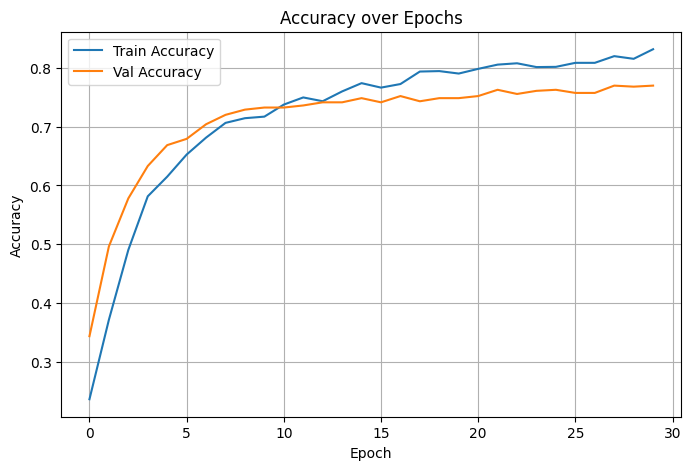

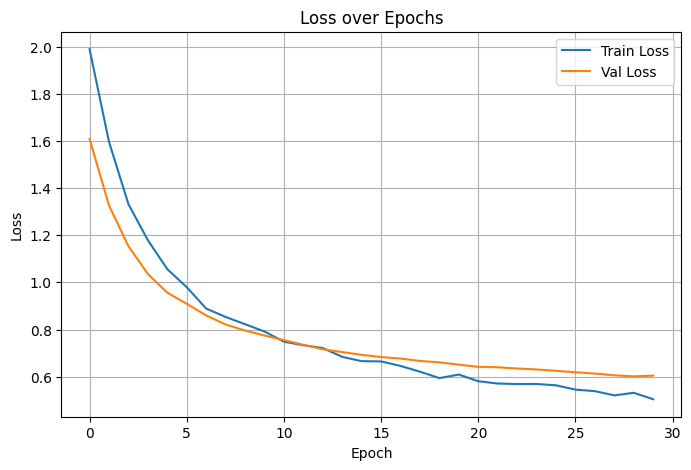

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Kích thước ảnh đầu vào (chuẩn cho MobileNetV2 / EfficientNet)
IMG_SIZE = (224, 224)

# Số lớp cần phân loại
NUM_CLASSES = 6

# Batch size cho quá trình huấn luyện
BATCH_SIZE = 32

# Số epoch tối đa
EPOCHS = 30

# Tên model backbone sử dụng ("mobilenetv2" hoặc "efficientnet")
MODEL_NAME = "mobilenetv2"

# Tạo thư mục để lưu model và biểu đồ (nếu chưa tồn tại)
os.makedirs("/content/model", exist_ok=True)


# ----------------------------- Build model -----------------------------
def build_model(model_name="mobilenetv2"):
    """
    Hàm xây dựng mô hình CNN dựa trên Transfer Learning.
    Backbone có thể là MobileNetV2 hoặc EfficientNetB0.
    """

    # Chọn backbone tương ứng
    if model_name.lower() == "mobilenetv2":
        base_model = MobileNetV2(
            weights='imagenet',          # Sử dụng trọng số pretrained trên ImageNet
            include_top=False,           # Bỏ phần fully connected gốc
            input_shape=(*IMG_SIZE, 3)   # Kích thước ảnh đầu vào
        )
    else:
        base_model = EfficientNetB0(
            weights='imagenet',
            include_top=False,
            input_shape=(*IMG_SIZE, 3)
        )

    # Đóng băng backbone để không cập nhật trọng số khi huấn luyện
    base_model.trainable = False

    # Lấy output của backbone
    x = base_model.output

    # Global Average Pooling để giảm số chiều và tránh overfitting
    x = GlobalAveragePooling2D()(x)

    # Dropout giúp giảm overfitting
    x = Dropout(0.3)(x)

    # Lớp fully connected cuối cùng cho phân loại
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    # Xây dựng model hoàn chỉnh
    model = Model(inputs=base_model.input, outputs=predictions)

    return model


# ----------------------------- Train -----------------------------
if __name__ == "__main__":

    # Lấy generator cho tập train, validation và test
    # (Hàm này đã được định nghĩa ở cell trước)
    train_gen, val_gen, test_gen = get_data_generators()

    # Xây dựng model
    model = build_model(MODEL_NAME)

    # Compile model với optimizer Adam
    model.compile(
        optimizer=Adam(1e-4),                # Learning rate nhỏ để fine-tune ổn định
        loss='categorical_crossentropy',     # Dùng cho bài toán multi-class
        metrics=['accuracy']                 # Đánh giá bằng accuracy
    )

    # Callback lưu model tốt nhất theo val_accuracy
    checkpoint = ModelCheckpoint(
        "/content/model/model.h5",
        monitor='val_accuracy',   # Theo dõi độ chính xác trên tập validation
        save_best_only=True,      # Chỉ lưu model tốt nhất
        verbose=1
    )

    # Callback dừng sớm nếu val_loss không cải thiện
    earlystop = EarlyStopping(
        monitor='val_loss',
        patience=5,               # Chờ 5 epoch trước khi dừng
        restore_best_weights=True,# Khôi phục trọng số tốt nhất
        verbose=1
    )

    # Huấn luyện model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[checkpoint, earlystop]
    )

    print("Training finished!")


    # ----------------------------- Plot -----------------------------
    import matplotlib.pyplot as plt

    # Vẽ biểu đồ Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig("/content/model/accuracy_plot.png")
    plt.show()

    # Vẽ biểu đồ Loss
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig("/content/model/loss_plot.png")
    plt.show()


## EVALUATE

Found 2638 images belonging to 6 classes.
Found 564 images belonging to 6 classes.
Found 571 images belonging to 6 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
Accuracy: 80.38528896672504
Precision: 80.55769792087656
Recall: 80.38528896672504
F1: 80.28912935627194


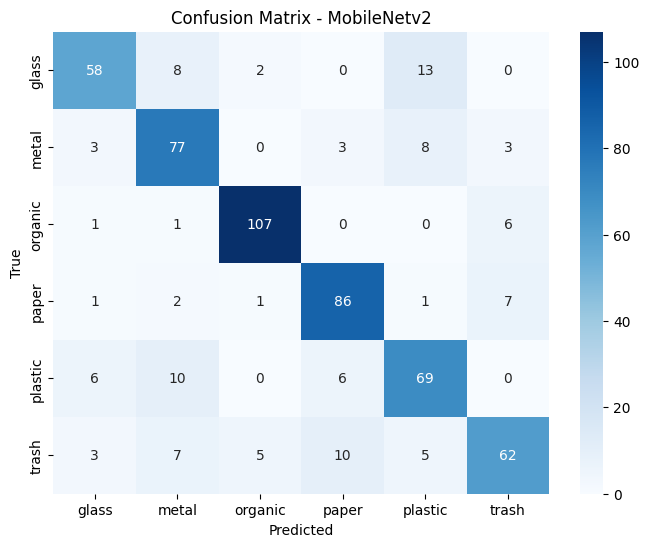


Classification Report:
              precision    recall  f1-score   support

       glass       0.81      0.72      0.76        81
       metal       0.73      0.82      0.77        94
     organic       0.93      0.93      0.93       115
       paper       0.82      0.88      0.85        98
     plastic       0.72      0.76      0.74        91
       trash       0.79      0.67      0.73        92

    accuracy                           0.80       571
   macro avg       0.80      0.80      0.80       571
weighted avg       0.81      0.80      0.80       571



In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# from preprocess_colab import get_data_generators # Dòng này gây lỗi ModuleNotFoundError
from sklearn.metrics import (
    accuracy_score, precision_score, f1_score,
    recall_score, classification_report, confusion_matrix
)
import numpy as np

MODEL_PATH = "model.h5"

if __name__ == "__main__":
    # Lấy test generator. Hàm này đã được định nghĩa ở ô trên nên không cần import.
    _, _, test_gen = get_data_generators()

    # Load model đã train
    model = load_model(MODEL_PATH)

    # Dự đoán
    test_gen.reset()
    preds = model.predict(test_gen, verbose=1)

    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    class_names = list(test_gen.class_indices.keys())

    # In kết quả
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print("Precision:", precision_score(y_true, y_pred, average='weighted') * 100)
    print("Recall:", recall_score(y_true, y_pred, average='weighted') * 100)
    print("F1:", f1_score(y_true, y_pred, average='weighted') * 100)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - MobileNetv2")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))